In [ ]:
pip install pandas numpy matplotlib statsmodels sklearn tensorflow

In [ ]:
pip install pandas

In [3]:
#rata-rata (Average)
import pandas as pd
data = pd.read_csv('sales_data.csv', parse_dates=['Month'], index_col='Month')
forecast = data['Revenue'].mean()
print(f"Perkiraan penjualan bulan berikutnya: {forecast}")

Perkiraan penjualan bulan berikutnya: 754.3703598853463


C:\Users\asus\AppData\Local\Temp\ipykernel_12884\261935487.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('sales_data.csv', parse_dates=['Month'], index_col='Month')


In [5]:
#rata-rata bergerak (Moving Average)
window = 3  # Rentang waktu untuk rata-rata bergerak
data['Moving_Average'] = data['Revenue'].rolling(window=window).mean()
print(data.tail())

            Date  Day  Year  Customer_Age       Age_Group Customer_Gender  \
Month                                                                       
April  4/12/2016   12  2016            41  Adults (35-64)               M   
April   4/2/2014    2  2014            18     Youth (<25)               M   
April   4/2/2016    2  2016            18     Youth (<25)               M   
March   3/4/2014    4  2014            37  Adults (35-64)               F   
March   3/4/2016    4  2016            37  Adults (35-64)               F   

              Country          State Product_Category Sub_Category  \
Month                                                                
April  United Kingdom        England         Clothing        Vests   
April       Australia     Queensland         Clothing        Vests   
April       Australia     Queensland         Clothing        Vests   
March          France  Seine (Paris)         Clothing        Vests   
March          France  Seine (Paris)    

In [ ]:
pip install statsmodels --index-url https://pypi.org/simple

In [7]:
#perataan eksponensial (exponential smoothing)
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(data['Revenue'])
model_fit = model.fit(smoothing_level=0.2, optimized=False)
forecast = model_fit.forecast(steps=12)
print(forecast)

C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index

113036    965.283155
113037    965.283155
113038    965.283155
113039    965.283155
113040    965.283155
113041    965.283155
113042    965.283155
113043    965.283155
113044    965.283155
113045    965.283155
113046    965.283155
113047    965.283155
dtype: float64


In [4]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
print("statsmodels is installed!")

statsmodels is installed!


In [9]:
#model ARIMA (Auto-Regressive Integrated Moving Average)
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Revenue'], order=(5,1,0))  # (p,d,q)
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
print(forecast)

C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:

113036    1048.646074
113037     985.111246
113038    1105.947545
113039    1110.486649
113040    1116.345592
113041    1102.030827
113042    1094.934941
113043    1083.040251
113044    1098.046526
113045    1097.652954
113046    1099.470999
113047    1096.053967
Name: predicted_mean, dtype: float64


C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
pip install tensorflow --upgrade

In [ ]:
pip install scikit-learn

In [8]:
pip show tensorflow

Note: you may need to restart the kernel to use updated packages.


In [11]:
#Forecasting dengan model LSTM(Long Short-Term Memory)
#1. Preprocessing Data
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data_values = data['Revenue'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_values)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 3
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], time_step, 1)
X_test = X_test.reshape(X_test.shape[0], time_step, 1)

C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 2.4271e-04
Epoch 2/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 1.9893e-04
Epoch 3/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 1.9417e-04
Epoch 4/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 1.8960e-04
Epoch 5/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 1.9102e-04
Epoch 6/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 1.9343e-04
Epoch 7/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 1.8484e-04
Epoch 8/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 1.8383e-04
Epoch 9/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 1.8630e-04
Epoch 10/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 1.7943e-04
Epoch 11/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 1.8081e-04
Epoch 12/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 1.8190e-04
Epoch 13/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 1.8150e-04
Epoch 14/100
2826/282

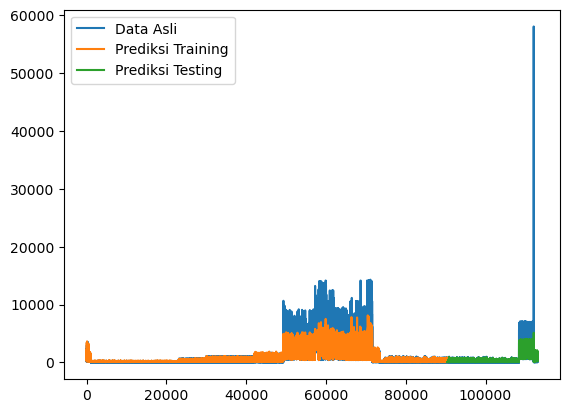

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

import matplotlib.pyplot as plt

plt.plot(scaler.inverse_transform(scaled_data), label='Data Asli')
plt.plot(np.arange(time_step, len(train_predict) + time_step), train_predict, label='Prediksi Training')
plt.plot(np.arange(len(train_predict) + 2*time_step, len(train_predict) + 2*time_step + len(test_predict)), test_predict, label='Prediksi Testing')
plt.legend()
plt.show()